## Import librairies

In [113]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px 
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [136]:
df = pd.read_csv("Speed Dating Data.csv", encoding="ISO-8859-1")
display(df.shape)
display(df.head())

(8378, 195)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


### Remove useless columns

In [138]:
remove_col = []
for col in df.columns:
    if df[col].isnull().sum()/df.shape[0]>=0.80:
        remove_col.append(col)
print("Number of colums with half or more missing values : ",len(remove_col))

df.drop(remove_col, axis=1, inplace=True)

print("Shape new dataset : ", df.shape)

df.head()

Number of colums with half or more missing values :  2
Shape new dataset :  (8378, 193)


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


### Map columns gender, race and goal

In [147]:
# Map gender ids to labels
df["gender"] = df.gender.map({0:"Woman", 
                              1:"Man"})

df["race"] = df.race.map({1:"Black", 
                          2:"European", 
                          3:"Latino", 
                          4:"Asian", 
                          5:"Native", 
                          6:"Other"})
df["goal"] = df.goal.map({
                        1: "Seemed like a fun night out",
                        2:"To meet new people",
                        3: "To get a date",
                        4: "Looking for a serious relationship",
                        5: "To say I did it",
                        6: "Other"})
def imp(x):
    if x==99.0:
        return "Missing"
    if x<=3.0:
        return "not important"
    if 4.0<=x<=7.0:
        return "important"
    elif x>7.0:
        return "very important"
    else:
        "Other"

## Know partipants better

In [64]:
# Create a new dataframe with distinct participants
df_participants = df[["iid", "age", "gender", "race", "goal", "imprace", "imprelig"]].drop_duplicates()

df_participants.race.fillna("Missing", inplace=True)
df_participants.goal.fillna("Missing", inplace=True)
print(df_participants.shape)
df_participants.head()

(551, 7)


,iid,age,gender,race,goal,imprace,imprelig
0,1,21.0,Woman,Asian,To meet new people,2.0,4.0
10,2,24.0,Woman,European,Seemed like a fun night out,2.0,5.0
20,3,25.0,Woman,European,Other,8.0,4.0
30,4,23.0,Woman,European,Seemed like a fun night out,1.0,1.0
40,5,21.0,Woman,European,To meet new people,8.0,1.0


In [65]:
df_participants["imprace_cat"] = df_participants.imprace.apply(lambda x: x if pd.notnull(x) else 99)
df_participants["imprace_cat"] = df_participants.imprace_cat.apply(lambda x: imp(x))

df_participants["imprel_cat"] = df_participants.imprelig.apply(lambda x: x if pd.notnull(x) else 99)
df_participants["imprel_cat"] = df_participants.imprel_cat.apply(lambda x: imp(x))

### Proportion of male and female

In [26]:
for i in range(len(df_participants.gender.value_counts(normalize=True))):
    print(f"proportion of {df_participants.gender.value_counts(normalize=True).index[i]} : {df_participants.gender.value_counts(normalize=True)[i]:2.2%}")

proportion of Man : 50.27%
proportion of Woman : 49.73%


### Age distribution by gender

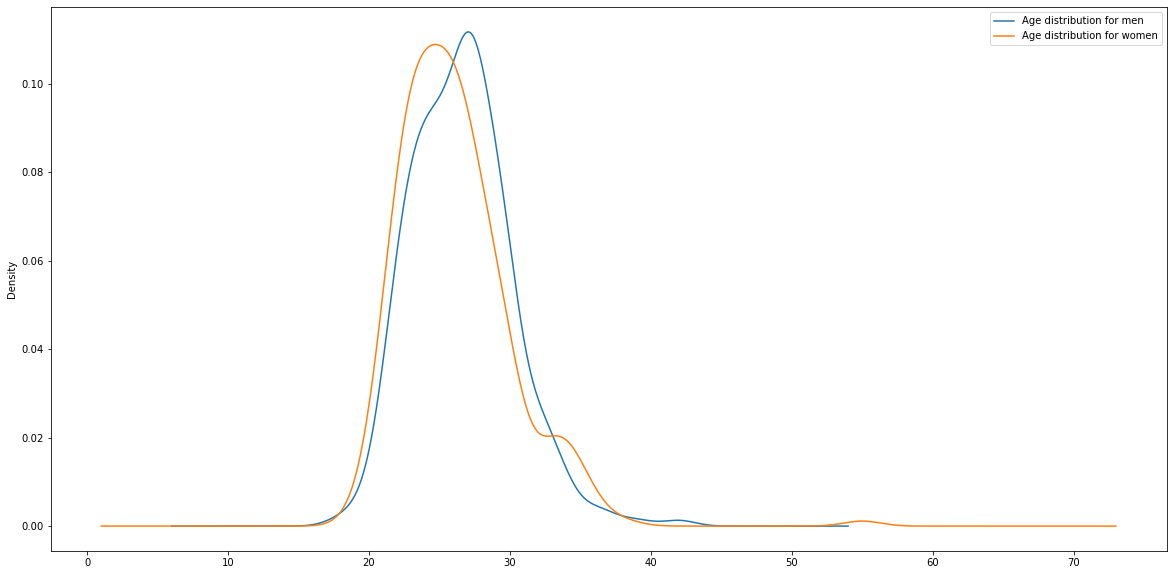

In [27]:
plt.figure(figsize=(20,10))
df_participants[df_participants.gender=="Man"].age.plot(kind="kde", label="Age distribution for men")
df_participants[df_participants.gender=="Woman"].age.plot(kind="kde", label="Age distribution for women")
plt.legend()
plt.show()

Most of the participants are between 20 and 30 years old

### Repartition of race by gender

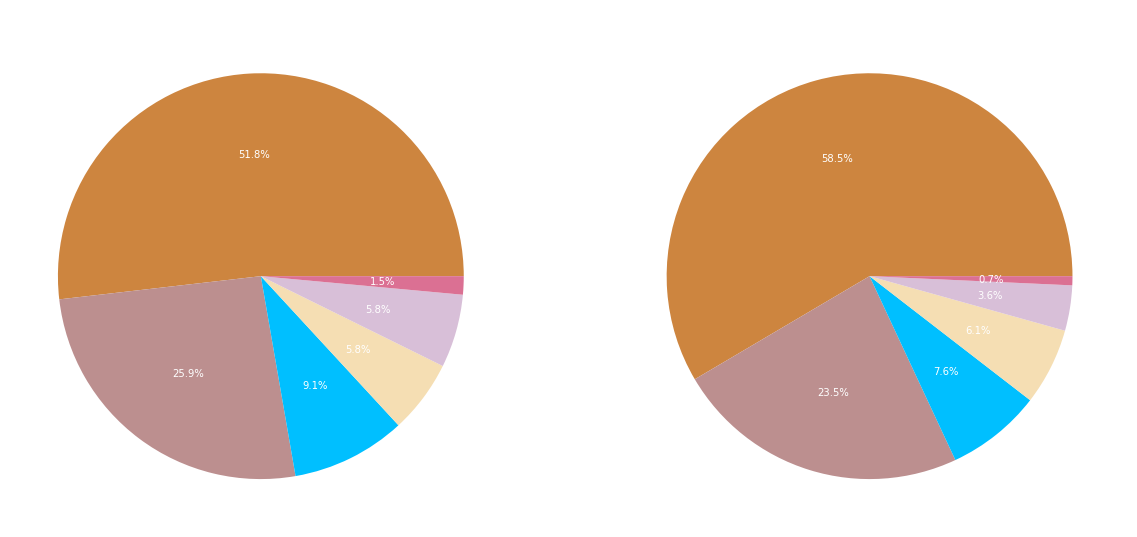

In [28]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 15))
ax1.pie(x=df_participants[df_participants.gender=="Woman"].race.value_counts(), 
       labels=df_participants.race.unique(), 
       textprops = dict(color ="white"), 
       colors=["peru", "rosybrown", "deepskyblue", "wheat", "thistle", "palevioletred"],
       autopct='%1.1f%%')
ax1.set_title("Race repartition for women", color="White")

ax2.pie(x=df_participants[df_participants.gender=="Man"].race.value_counts(), 
       labels=df_participants.race.unique(), 
       textprops = dict(color ="white"), 
       colors=["peru", "rosybrown", "deepskyblue", "wheat", "thistle", "palevioletred"],
       autopct='%1.1f%%')
ax2.set_title("Race repartition for men", color="White");

Most of the participants (male or female) are asians or europeans

### Repartition of the goal by gender

In [75]:
# Goal of women and men through the experience
df_goal_w = df_participants[df_participants.gender=="Woman"].goal.value_counts().to_frame().reset_index().rename(columns={"index":"goal", "goal":"Women"})
df_goal_m = df_participants[df_participants.gender=="Man"].goal.value_counts().to_frame().reset_index().rename(columns={"index":"goal", "goal":"Men"})

df_goal = df_goal_w.merge(df_goal_m)

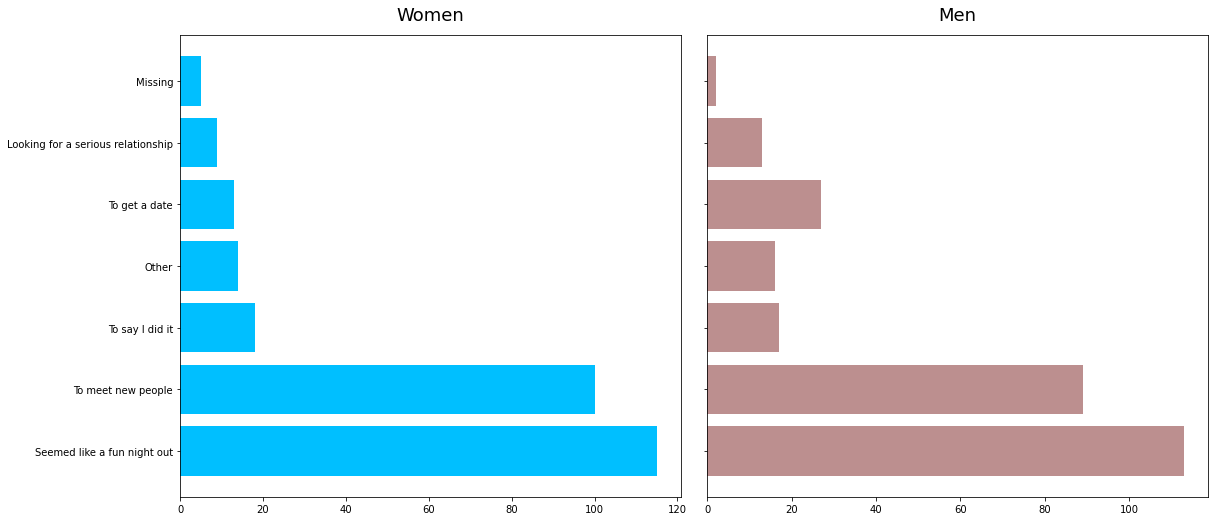

In [30]:
fig, axes = plt.subplots(figsize=(15,7), ncols=2, sharey=True)
fig.tight_layout()  
axes[0].barh(df_goal.goal, df_goal["Women"], color="deepskyblue")
axes[0].set_title("Women", fontsize=18, pad=15)
axes[1].barh(df_goal.goal, df_goal["Men"], color="rosybrown")
axes[1].set_title("Men", fontsize=18, pad=15)
axes[0].set(yticks=df_goal.goal, yticklabels=df_goal.goal)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis="y", colors="black")

Most of the participants want to have fun or meet new people, not necessarily to have a serious relationship

### Importance of sharing the same race by gender

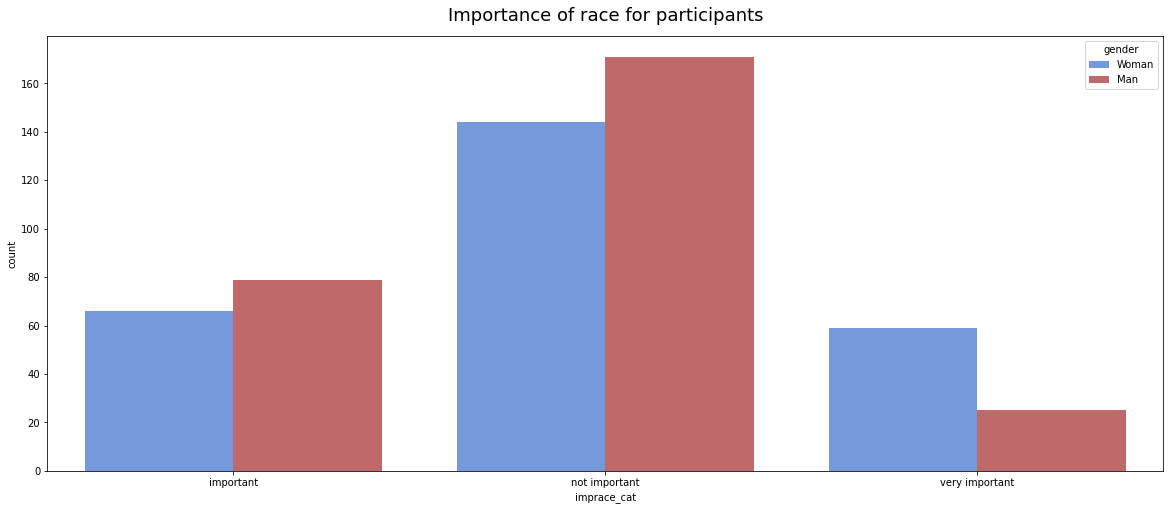

In [69]:
fig, ax = plt.subplots(figsize=(20,8))
sns.countplot(data=df_participants.dropna(subset="imprace"),
              x=df_participants.dropna(subset="imprace").imprace_cat.sort_values().astype(str).apply(lambda x: x.split(".")[0]), 
              hue="gender",
              palette=["#6495ED", "#CD5C5C"])
ax.set_title("Importance of race for participants", fontsize=18, pad=15);

It seems like the race of the patner is more important for women

### Importance of sharing the same religion by gender

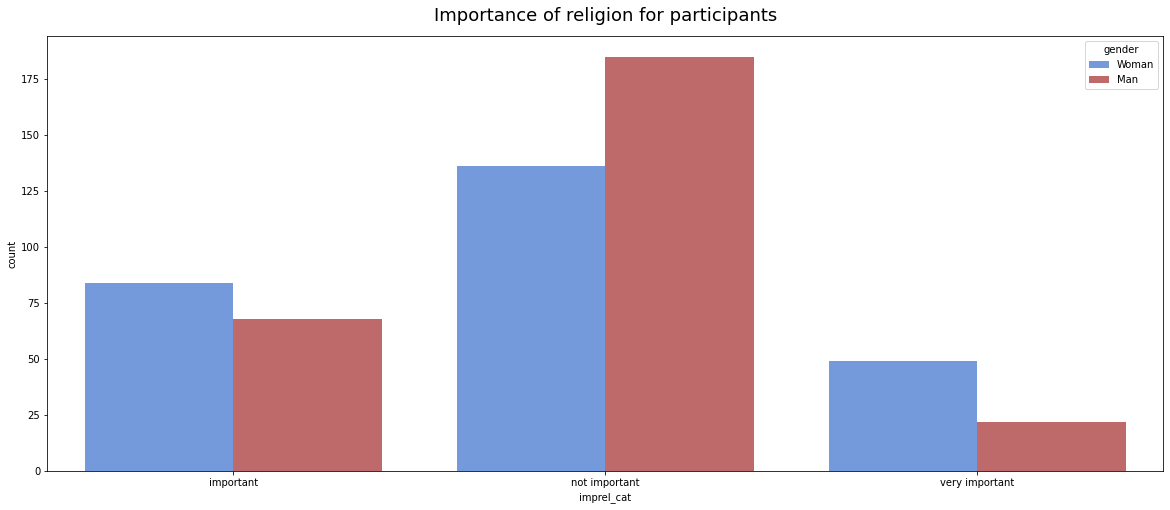

In [72]:
fig, ax = plt.subplots(figsize=(20,8))
sns.countplot(data=df_participants.dropna(subset="imprelig"),
              x=df_participants.dropna(subset="imprelig").imprel_cat.sort_values().astype(str).apply(lambda x: x.split(".")[0]), 
              hue="gender",
              palette=["#6495ED", "#CD5C5C"])
ax.set_title("Importance of religion for participants", fontsize=18, pad=15);

Women cares more about their partner's religion than men

## Do participants match more if they share the same race or have the same goal?

In [ ]:
fig, axes = plt.subplots(figsize=(15,7), ncols=2, sharey=True)
axes[0].barh(df_goal.goal, df_goal["Women"], color="deepskyblue")
axes[0].set_title("Women", fontsize=18, pad=15)
axes[1].barh(df_goal.goal, df_goal["Men"], color="rosybrown")
axes[1].set_title("Men", fontsize=18, pad=15)
axes[0].set(yticks=df_goal.goal, yticklabels=df_goal.goal)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis="y", colors="black")

In [127]:
px.pie(df[df.match==1], values=df[df.match==1].samerace.value_counts(sort=False, normalize=True), names=df[df.match==1].samerace_label.unique())

In [166]:
fig = px.pie(df[df.match==1], values=df[df.match==1].goal.value_counts(sort=False), names=df[df.match==1].goal.dropna().unique())
fig.show()

## Attributes participants are looking for

In [218]:
waves = [i for i in range(1, 22)]
wave1 = [i for i in waves if i not in (6, 7, 8, 9)]
wave2 = [i for i in waves if i in (6, 7, 8, 9)]
print("Waves with attributes rated on a scale of 1 to 10 :", wave1)
print("Waves with 100 points distributed among attributes :", wave2)

Waves with attributes rated on a scale of 1 to 10 : [1, 2, 3, 4, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Waves with 100 points distributed among attributes : [6, 7, 8, 9]


In [199]:
df_imp_attr = df.loc[df.wave.isin(wave1), :].groupby(['gender'], as_index=False)\
                    ['attr1_s' , 'sinc1_s' , 'intel1_s' , 'fun1_s' , 'amb1_s' , 'shar1_s']\
                    .mean(['attr1_s' , 'sinc1_s' , 'intel1_s' , 'fun1_s' , 'amb1_s' , 'shar1_s'])

df_imp_attr

,gender,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s
0,Man,26.824944,12.839219,15.459805,14.301277,8.250563,9.910218
1,Woman,18.408643,15.974981,17.394238,13.880970,10.296437,12.761183


In [211]:
categories = ['Attractive' , 'Sincere' , 'Intelligent' , 'Fun' , 'Ambitious' , 'Shared interest']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=df_imp_attr.loc[0, ['attr1_s' , 'sinc1_s' , 'intel1_s' , 'fun1_s' , 'amb1_s' , 'shar1_s']].tolist(),
      theta=categories,
      fill='toself',
      name='men'))

fig.add_trace(go.Scatterpolar(
      r=df_imp_attr.loc[1, ['attr1_s' , 'sinc1_s' , 'intel1_s' , 'fun1_s' , 'amb1_s' , 'shar1_s']].tolist(),
      theta=categories,
      fill='toself',
      name='women'))

fig.update_layout(
      polar=dict(radialaxis=dict(visible=True, range=[0, 28])), showlegend=True, title="Attributes particapants are looking for")

fig.show()

## What make particpant match?

In [216]:
ratings = df[df.match==1].groupby(['gender'], as_index=False)\
                    ['attr' , 'sinc' , 'intel' , 'fun' , 'amb' , 'shar']\
                    .mean(['attr' , 'sinc' , 'intel' , 'fun' , 'amb' , 'shar'])

ratings

,gender,attr,sinc,intel,fun,amb,shar
0,Man,7.520319,7.798246,7.825292,7.552786,7.183409,6.654874
1,Woman,7.118459,7.820700,8.075073,7.644217,7.485271,6.854167


In [217]:
categories = ['Attractive' , 'Sincere' , 'Intelligent' , 'Fun' , 'Ambitious' , 'Shared interest']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=ratings.loc[0,  ['attr' , 'sinc' , 'intel' , 'fun' , 'amb' , 'shar']].tolist(),
      theta=categories,
      fill='toself',
      name='men'))

fig.add_trace(go.Scatterpolar(
      r=ratings.loc[1,  ['attr' , 'sinc' , 'intel' , 'fun' , 'amb' , 'shar']].tolist(),
      theta=categories,
      fill='toself',
      name='women'))

fig.update_layout(
      polar=dict(radialaxis=dict(visible=True, range=[0, 10])), showlegend=True, title="Attributes that make men match")

fig.show()